\# Little Job

# MNIST Handwritten Digit Classification: A Deep Dive

## Introduction

Welcome to the world of MNIST handwritten digit classification.Our mission? To build a neural network that can distinguish between digits 0 through 9 as the most precision as possible.

### Goal

In this notebook, we create a neural network that recognizes handwritten digits. Our goal is to achieve high accuracy in classifying these digits, turning a jumble of pixels into clear, recognized numbers.

### Approach

To accomplish this, we’ll follow a methodical approach, akin to baking the perfect cake or assembling a complex jigsaw puzzle:

1. **Data Loading and Exploration:** We’ll start by inviting the MNIST dataset to our house, taking a good look at a selection of images to understand what we’re dealing with.
2. **Data Preprocessing:** We’ll normalize and reshape our data to ensure it’s in prime condition for training.
3. **Model Building:** Using the Keras library, we’ll design a neural network architecture..
4. **Model Training:** Our neural network will undergo rigorous training, learning to spot the subtle differences between digits.
5. **Model Evaluation:** Finally, we’ll put our detective to the test on the MNIST test set, evaluating its performance and visualizing its predictions. This is where we see if our training has paid off.



In [16]:
# We use tensorflow to create and handle the model.
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
# Load in the data from the library mnist from tensorflow.
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# As you can see, the data is loaded in as numpy arrays.
print(type(X_train))

<class 'numpy.ndarray'>


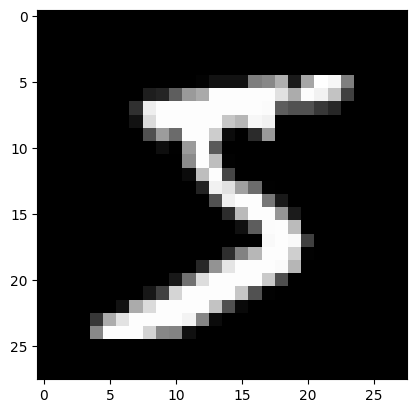

In [17]:
# Let's take a look at the images.
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()

60000


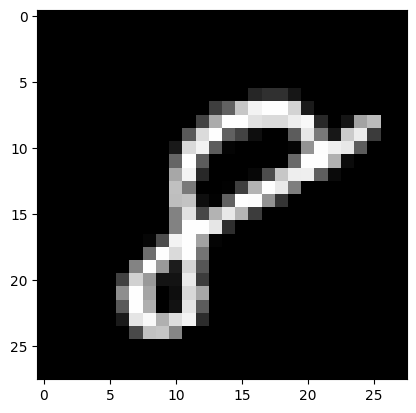

In [23]:
# We can have 60,000 images in the training set. Let' look at the shape of the data.
print(len(X_train))
plt.imshow(X_train[len(X_train)-1], cmap='gray')
plt.show()

We know the first and the last image. They're not easy to recognize, but we can see that they are numbers. I hope the model can recognize them better than we can.

In [4]:
# Let's look at the shape of the data.
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
# We have 60,000 images in the training set and 10,000 images in the test set. Ok!

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)


That's because the model works better with data between 0 and 1 (the most common case).

In [ ]:
# Normalize the data to be between 0 and 1.
X_train, X_test = X_train / 255.0, X_test / 255.0

You have to understand that an epoch is a full iteration over the data $N\times W\times H$ (samples, width and height). Then we have to flatten the data to be able to feed it to the model. You can do it with numpy or with the Flatten layer from Keras. Let's let Keras do it for us.

In [6]:
# Build the model with the Sequential API from Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Each sample is 28x28, so flatten it to a 1D array of 28*28=784
    tf.keras.layers.Dense(128, activation='relu'),  # 128 neurons will look at the data and learn patterns
    tf.keras.layers.Dropout(0.2),                   # Dropout 20% of the neurons to prevent overfitting (it's random which ones are dropped)
    tf.keras.layers.Dense(10, activation='softmax') # 10 output neurons, one for each digit, with softmax activation (probabilities that sum to 1)
])

Dropout is a technique to prevent overfitting. It randomly drops some neurons during training. It will get rid of strong dependencies on a single neuron (or a few neurons) and will make the model more robust. That's because the neuron is seemingly important will not be there all the time, so the other neurons have to learn to do the job.

In [24]:
# Compile the model (the strategy to minimize the loss function)
model.compile(
    optimizer   = 'adam',   # It's the way to minimize the loss function
    loss        = 'sparse_categorical_crossentropy', # The loss function to minimize. We use sparse_categorical_crossentropy because we have integers as labels and not one-hot encoded labels. Sparse is faster and uses less memory.
    metrics     = ['accuracy'] # The metric to show the user (it doesn't affect the training)
)

A bit more about the sparse. If we have a one-hot encoded target variable, the loss function will consider the error between all the classes. But for each image, we only have one correct class. So, we can use the sparse_categorical_crossentropy loss function, which calculates the error only for the correct class. Easy, am I right?

In [8]:
# Train model
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test)
)

Epoch 1/10


2024-06-11 20:54:18.332630: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-11 20:54:19.351200: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa24e12fbb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-11 20:54:19.351259: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-06-11 20:54:19.372198: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-11 20:54:19.419281: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1718150059.546616    3069 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 14s 6ms/step - loss: 0.2966 - accuracy: 0.9134 - val_loss: 0.1388 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1437 - accuracy: 0.9563 - val_loss: 0.1015 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1078 - accuracy: 0.9677 - val_loss: 0.0838 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0880 - accuracy: 0.9730 - val_loss: 0.0797 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0747 - accuracy: 0.9769 - val_loss: 0.0749 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0694 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.0688 - val_accuracy: 0.9

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt

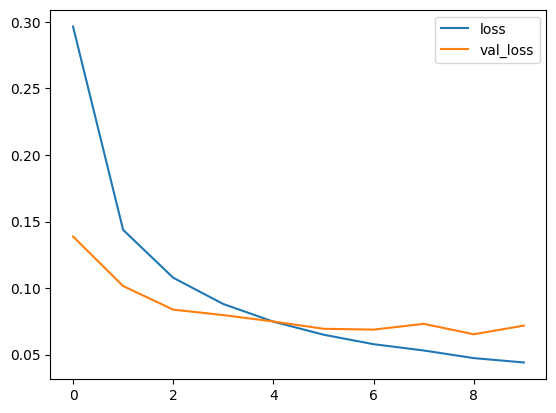

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

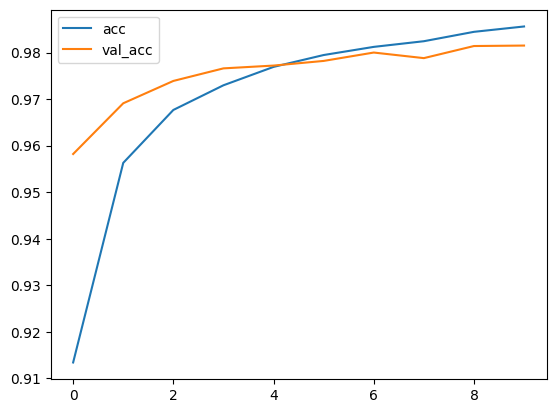

In [11]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend();

In [12]:
# Evaluate the model
print(model.evaluate(X_test, y_test, verbose=2))

313/313 - 2s - loss: 0.0718 - accuracy: 0.9815 - 2s/epoch - 5ms/step
[0.07179109007120132, 0.9815000295639038]


It's pretty good! We have a model that can recognize handwritten digits with almost 99% accuracy. That's a great result. Let's look the results at a visual level.

In [25]:
# Preparing the libraries for the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[ 970    0    2    1    0    0    2    1    2    2]
 [   0 1125    4    1    0    1    1    1    2    0]
 [   1    0 1023    1    2    0    2    3    0    0]
 [   1    0    6  995    0    2    0    2    2    2]
 [   0    0    2    0  967    0    3    1    1    8]
 [   2    1    0   17    1  864    2    0    3    2]
 [   4    3    1    1    1    4  941    1    2    0]
 [   1    3   12    3    3    0    0  998    1    7]
 [   5    0    2    8    5    2    3    2  944    3]
 [   2    2    0    8    6    1    0    2    0  988]]


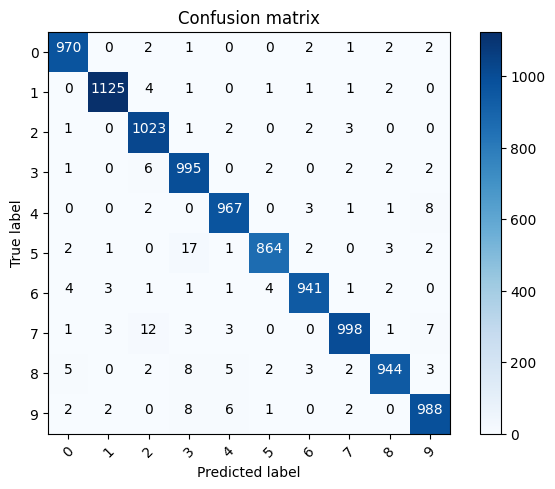

In [14]:
# This is a great function to plot the confusion matrix
def plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues
    ):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot the confusion matrix   
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

It's great! But... I want to see the wrong predictions. Don't you?

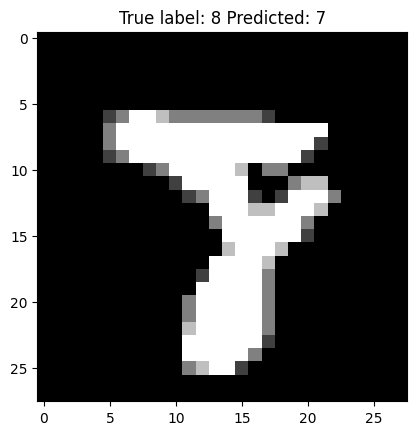

In [27]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));


Run the cell more than once to see different wrong predictions. And.. well, it seems it's difficult to recognize even for us! Than we can say that the model is doing a great job!